In [2]:
import pandas as pd
from datetime import datetime

In [4]:
chunksize = 10 ** 6
num_of_chunks = 0
train = pd.DataFrame()
parse_date = lambda val : datetime.strptime(val, '%y%m%d%H')

for chunk in pd.read_csv(
        '/Users/intern/PycharmProjects/ctr-prediction/data/input/train',
        parse_dates=['hour'],
        date_parser=parse_date,
        chunksize=chunksize):
    num_of_chunks += 1
    train = pd.concat([train, chunk.sample(frac=0.5, replace=False, random_state=1234)], axis=0)
    print(f'Processing chunk number: {num_of_chunks}')

train.reset_index(inplace=True)
train_len = len(train)
train_len

Processing chunk number: 1
Processing chunk number: 2
Processing chunk number: 3
Processing chunk number: 4
Processing chunk number: 5
Processing chunk number: 6
Processing chunk number: 7
Processing chunk number: 8
Processing chunk number: 9
Processing chunk number: 10
Processing chunk number: 11
Processing chunk number: 12
Processing chunk number: 13
Processing chunk number: 14
Processing chunk number: 15
Processing chunk number: 16
Processing chunk number: 17
Processing chunk number: 18
Processing chunk number: 19
Processing chunk number: 20
Processing chunk number: 21
Processing chunk number: 22
Processing chunk number: 23
Processing chunk number: 24
Processing chunk number: 25
Processing chunk number: 26
Processing chunk number: 27
Processing chunk number: 28
Processing chunk number: 29
Processing chunk number: 30
Processing chunk number: 31
Processing chunk number: 32
Processing chunk number: 33
Processing chunk number: 34
Processing chunk number: 35
Processing chunk number: 36
P

20214484

In [5]:
train['month'] = train['hour'].dt.month
train['dayofweek'] = train['hour'].dt.dayofweek
train['day'] = train['hour'].dt.day
train['hour_time'] = train['hour'].dt.hour
train.head(2)

,index,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,...,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
0,433572,7.582956e+18,1,2014-10-21 02:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,...,50,2201,3,35,-1,43,10,1,21,2
1,254298,9.742865e+17,0,2014-10-21 01:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,9f06e9a1,...,50,2480,3,297,100111,61,10,1,21,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20214484 entries, 0 to 20214483
Data columns (total 29 columns):
 #   Column            Dtype         
---  ------            -----         
 0   index             int64         
 1   id                float64       
 2   click             int64         
 3   hour              datetime64[ns]
 4   C1                int64         
 5   banner_pos        int64         
 6   site_id           object        
 7   site_domain       object        
 8   site_category     object        
 9   app_id            object        
 10  app_domain        object        
 11  app_category      object        
 12  device_id         object        
 13  device_ip         object        
 14  device_model      object        
 15  device_type       int64         
 16  device_conn_type  int64         
 17  C14               int64         
 18  C15               int64         
 19  C16               int64         
 20  C17               int64         
 21  C18   

In [7]:
train.isnull().sum()

index               0
id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour_time           0
dtype: int64

In [8]:
train.describe()

,index,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour_time
count,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,2.021448e+07,20214484.0,2.021448e+07,2.021448e+07,2.021448e+07
mean,2.021419e+07,9.223368e+18,1.698491e-01,1.004968e+03,2.879966e-01,1.015290e+00,3.314826e-01,1.884226e+04,3.188872e+02,6.009537e+01,2.112627e+03,1.432316e+00,2.270870e+02,5.320581e+04,8.339376e+01,10.0,2.601778e+00,2.546971e+01,1.127634e+01
std,1.167084e+07,5.325717e+18,3.755001e-01,1.094567e+00,5.063878e-01,5.275321e-01,8.549997e-01,4.958358e+03,2.131245e+01,4.728170e+01,6.093306e+02,1.326297e+00,3.509372e+02,4.995752e+04,7.029398e+01,0.0,1.728107e+00,2.963312e+00,5.953236e+00
min,0.000000e+00,5.211594e+11,0.000000e+00,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00,10.0,0.000000e+00,2.100000e+01,0.000000e+00
25%,1.010699e+07,4.611100e+18,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01,10.0,1.000000e+00,2.300000e+01,6.000000e+00
50%,2.021422e+07,9.224303e+18,0.000000e+00,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01,10.0,2.000000e+00,2.600000e+01,1.100000e+01
75%,3.032112e+07,1.383729e+19,0.000000e+00,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02,10.0,4.000000e+00,2.800000e+01,1.600000e+01
max,4.042897e+07,1.844674e+19,1.000000e+00,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02,10.0,6.000000e+00,3.000000e+01,2.300000e+01


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
numerical = []
categorical = []

for col in train.columns:
    if train[col].dtype == "object":
        categorical.append(col)
    else:
        numerical.append(col)
print("numerical columns = ", numerical)
print("\ncategorical columns = ", categorical)

numerical columns =  ['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour_time']

categorical columns =  ['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model']


<Axes: xlabel='click', ylabel='count'>

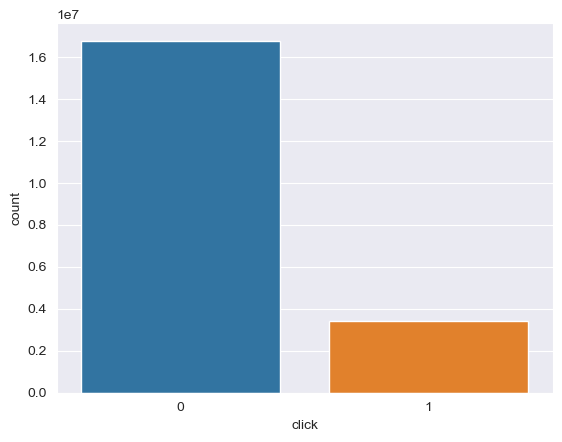

In [11]:
train.click.value_counts(normalize=True)
plt.figure()
sns.countplot(x='click', data=train)


In [12]:
print(f'Unique counts of site_id: {len(train.site_id.unique())}')
print(train.site_id.value_counts(normalize=True))

Unique counts of site_id: 4359
85f751fd    3.610485e-01
1fbe01fe    1.604176e-01
e151e245    6.526409e-02
d9750ee7    2.382702e-02
5b08c53b    2.260364e-02
                ...     
49a9cc1a    4.946948e-08
56bddb22    4.946948e-08
d3431e03    4.946948e-08
b19b2131    4.946948e-08
d0386648    4.946948e-08
Name: site_id, Length: 4359, dtype: float64


In [13]:
print(f'Unique counts of site_id: {len(train.site_domain.unique())}')
print(train.site_domain.value_counts(normalize=True))

Unique counts of site_id: 6548
c4e18dd6    3.743207e-01
f3845767    1.604176e-01
7e091613    8.225182e-02
7687a86e    3.191642e-02
98572c79    2.463976e-02
                ...     
06e58f11    4.946948e-08
d45c0d84    4.946948e-08
9bee0174    4.946948e-08
9f316d76    4.946948e-08
b553cb29    4.946948e-08
Name: site_domain, Length: 6548, dtype: float64


In [14]:
print(f'Unique counts of site_id: {len(train.site_category.unique())}')
print(train.site_category.value_counts(normalize=True))

Unique counts of site_id: 25
50e219e0    4.090785e-01
f028772b    3.130846e-01
28905ebd    1.824268e-01
3e814130    7.544763e-02
f66779e6    6.244433e-03
75fa27f6    3.982837e-03
335d28a8    3.396772e-03
76b2941d    2.589183e-03
c0dd3be3    1.038711e-03
72722551    6.929190e-04
dedf689d    6.047149e-04
70fb0e29    5.904677e-04
0569f928    4.200948e-04
8fd0aea4    1.852632e-04
a818d37a    7.672716e-05
42a36e14    6.144109e-05
e787de0e    3.072055e-05
bcf865d9    2.686193e-05
5378d028    1.197161e-05
9ccfa2ea    7.717239e-06
c706e647    6.431032e-07
da34532e    4.946948e-07
74073276    2.473474e-07
110ab22d    1.978779e-07
a72a0145    4.946948e-08
Name: site_category, dtype: float64


In [15]:
print(f'Unique counts of site_id: {len(train.app_id.unique())}')
print(train.app_id.value_counts(normalize=True))

Unique counts of site_id: 7444
ecad2386    6.389515e-01
92f5800b    3.850808e-02
e2fcccd2    2.792889e-02
9c13b419    1.880365e-02
febd1138    1.873666e-02
                ...     
78cbeec7    4.946948e-08
b4e1814d    4.946948e-08
16b94ad4    4.946948e-08
20b8415d    4.946948e-08
f6c2f1c3    4.946948e-08
Name: app_id, Length: 7444, dtype: float64


In [16]:
print(f'Unique counts of site_id: {len(train.app_domain.unique())}')
print(train.app_domain.value_counts(normalize=True))

Unique counts of site_id: 474
7801e8d9    6.736789e-01
2347f47a    1.295698e-01
ae637522    4.658284e-02
5c5a694b    2.793428e-02
82e27996    1.873726e-02
                ...     
2ee4f367    4.946948e-08
347bf088    4.946948e-08
8e1c9078    4.946948e-08
55cb48a1    4.946948e-08
5ab4623d    4.946948e-08
Name: app_domain, Length: 474, dtype: float64


In [17]:
print(f'Unique counts of site_id: {len(train.app_category.unique())}')
print(train.app_category.value_counts(normalize=True))

Unique counts of site_id: 33
07d7df22    6.471884e-01
0f2161f8    2.364550e-01
cef3e649    4.282469e-02
8ded1f7a    3.628497e-02
f95efa07    2.831262e-02
d1327cf5    3.026295e-03
dc97ec06    1.360361e-03
09481d60    1.352446e-03
75d80bbe    9.996298e-04
fc6fa53d    5.826021e-04
4ce2e9fc    5.109703e-04
879c24eb    3.147743e-04
a3c42688    2.776227e-04
4681bb9d    1.573624e-04
0f9a328c    1.363379e-04
a86a3e89    6.228207e-05
2281a340    5.332810e-05
8df2e842    4.318686e-05
79f0b860    1.395039e-05
0bfbc358    9.943365e-06
a7fd01ec    8.953976e-06
7113d72a    7.766708e-06
18b1e0be    5.787929e-06
2fc4f2aa    5.491112e-06
5326cf99    3.660741e-06
0d82db25    6.925727e-07
4b7ade46    3.957558e-07
bf8ac856    1.484084e-07
bd41f328    9.893896e-08
ef03ae90    9.893896e-08
71af18ce    9.893896e-08
86c1a5a3    4.946948e-08
6fea3693    4.946948e-08
Name: app_category, dtype: float64


In [18]:
print(f'Unique counts of site_id: {len(train.device_id.unique())}')
print(train.device_id.value_counts(normalize=True))

Unique counts of site_id: 1701617
a99f214a    8.250772e-01
0f7c61dc    5.317474e-04
c357dbff    4.869281e-04
936e92fb    3.407458e-04
afeffc18    2.359199e-04
                ...     
050f03b0    4.946948e-08
67045272    4.946948e-08
5fe99dee    4.946948e-08
c22ad887    4.946948e-08
c89e90cc    4.946948e-08
Name: device_id, Length: 1701617, dtype: float64


In [19]:
print(f'Unique counts of site_id: {len(train.device_ip.unique())}')
print(train.device_ip.value_counts(normalize=True))

Unique counts of site_id: 4660174
6b9769f2    5.175349e-03
431b3174    3.354229e-03
2f323f36    2.188134e-03
af9205f9    2.172353e-03
930ec31d    2.156276e-03
                ...     
cd4edb7e    4.946948e-08
866e2253    4.946948e-08
8a64fcfe    4.946948e-08
f60a6f16    4.946948e-08
be7567f2    4.946948e-08
Name: device_ip, Length: 4660174, dtype: float64


In [20]:
print(f'Unique counts of site_id: {len(train.device_model.unique())}')
print(train.device_model.value_counts(normalize=True))

Unique counts of site_id: 7692
8a4875bd    6.074174e-02
1f0bc64f    3.523291e-02
d787e91b    3.476389e-02
76dc4769    1.898490e-02
be6db1d7    1.837484e-02
                ...     
772ea7a3    4.946948e-08
42de30d9    4.946948e-08
4d328265    4.946948e-08
ab9ef912    4.946948e-08
cd44b12b    4.946948e-08
Name: device_model, Length: 7692, dtype: float64


KeyboardInterrupt: 

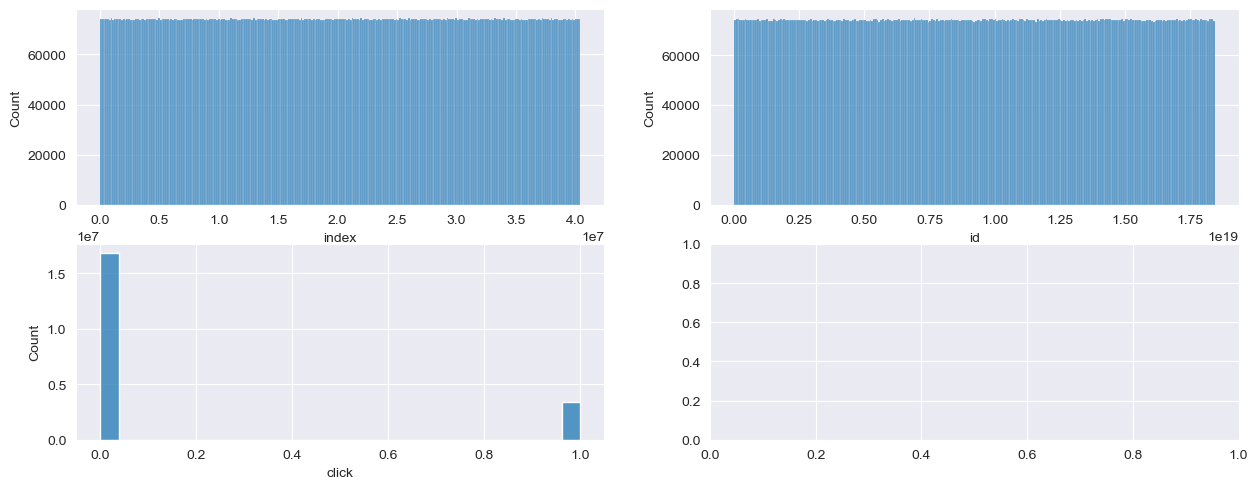

In [21]:
import math
n = 2
plt.figure(figsize=[15,3*math.ceil(len(numerical)/n)])

for i in range(len(numerical)):
    plt.subplot(math.ceil(len(numerical)/n),n,i+1)
    sns.histplot(train[numerical[i]])

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
correlation = train.corr()
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [22]:
train.drop(['month', 'C20'], axis=1, inplace=True)
train.columns

Index(['index', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C21',
       'dayofweek', 'day', 'hour_time'],
      dtype='object')

In [23]:
train.drop(['id', 'hour'], axis = 1, inplace = True)
train.rename(columns={'click': 'y',
                   'hour_time': 'hour'},
          inplace=True, errors='raise')

train.columns

Index(['index', 'y', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C21', 'dayofweek', 'day', 'hour'],
      dtype='object')

In [24]:
sampled_data = train.sample(frac=0.1, random_state=42)
X = sampled_data.drop(['y'], axis=1)
y = sampled_data['y']

In [ ]:
X.shape

In [25]:
X.to_csv('../data/output/X_train.csv', index=False)
y.to_csv('../data/output/y_train.csv', index=False)